#Importing all Libraries

In [179]:
import tensorflow as tf
import numpy as np
from numpy import mean,std
from sklearn.model_selection import KFold

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import SGD

from google.colab import files
from io import BytesIO
from PIL import Image
from pylab import *

from skimage import data
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline

#Importing the dataset from keras Library
The dataset contains 60000 training data and 10000 test data.

In [180]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [181]:
test_X.shape

(10000, 28, 28)

#Displaying the images

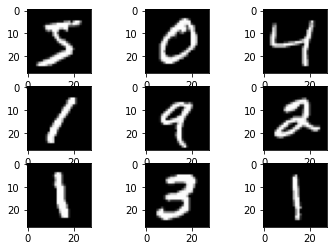

In [313]:
for i in range(9):  
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))

plt.show()

#Reshaping the data
This is done so as to input our data into the our CNN model.


In [182]:
trainX = train_X.reshape((train_X.shape[0], 28, 28, 1))
testX = test_X.reshape((test_X.shape[0], 28, 28, 1))

#One-Hot Encoding our target variable
Our target variables were numbers ranging from 0-9. So we use one-hot encoding to represent these using 0 and 1.


In [183]:
trainY = to_categorical(train_y)
testY = to_categorical(test_y)

#Normalizing out input data
Image normalization is a typical process in image processing that changes the range of pixel
intensity values. Its normal purpose is to convert an input image into a range of pixel values that
are more familiar or normal to the senses, hence the term normalization.


In [314]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

train_norm = train_norm / 255.0
test_norm = test_norm / 255.0


#Building the ***Model***

In [185]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9) #stochastic Gradient Descent
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [254]:
history=model.fit(train_norm,trainY,epochs=15,batch_size=32,validation_data=(test_norm, testY), verbose=1)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0994 - accuracy: 0.9704 - val_loss: 0.0464 - val_accuracy: 0.9837
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0776 - accuracy: 0.9768 - val_loss: 0.0376 - val_accuracy: 0.9884
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0606 - accuracy: 0.9807 - val_loss: 0.0355 - val_accuracy: 0.9882
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.0349 - val_accuracy: 0.9874
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0459 - accuracy: 0.9852 - val_loss: 0.0292 - val_accuracy: 0.9900
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0311 - val_accuracy: 0.9901
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0367 - accuracy: 0.9881 - val_loss: 0.0271 - val_accuracy:

In [255]:
model.evaluate(test_norm, testY, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0289 - accuracy: 0.9908


[0.028922557830810547, 0.9908000230789185]

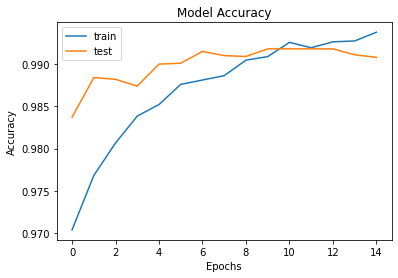

In [256]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#**Testing our Model**

#Uploading image

In [299]:
uploaded_content = files.upload()
digit_image1 = Image.open(BytesIO(uploaded_content['seven.jpg']))

Saving seven.jpg to seven (1).jpg


#Displaying the digit

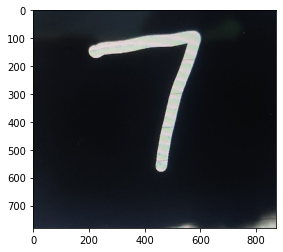

In [301]:
imshow(digit_image1)

#Prepocessing the image
We have to convert the image into numpy array to feed into our model.

In [192]:
def preprocess_image(imag):
    img = imag.resize((28,28))
    img = img_to_array(img)
    #img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return img

In [303]:
img2=preprocess_image(digit_image1)

#Converting to greyscale

In [315]:
img2_grayscale = rgb2gray(img2)

#Reshape and normalize

In [308]:
def reshape_norm(image):
  img=image.reshape(1, 28, 28, 1)
  img = img.astype('float32')
  # normalize to range 0-1
  img = img / 255.0
  return img

In [307]:
resimg2=reshape_norm(img2_grayscale)

In [317]:
y=model.predict(resimg22)

In [319]:
argmax(y)

7